![DATE Header.jpg](attachment:d64f97f0-2424-4123-bc18-83e689731a30.jpg)
##  DEEP LEARNING INTERNSHIP PROGRAM

### GRADED Mini Project 1: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

DOWNLOAD & EXTRACT DATA FROM: https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip


* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [29]:
import os
import zipfile
import requests
from PIL import Image
import numpy as np
from tqdm import tqdm

def download_file(url, save_path):
    """Download a file from a URL with progress bar"""
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))

    with open(save_path, 'wb') as f, tqdm(
        desc=save_path,
        total=total_size,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            size = f.write(data)
            bar.update(size)

def extract_zip(zip_path, extract_to):
    """Extract zip file with progress"""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Get list of files and total size for progress bar
        file_list = zip_ref.infolist()
        total_size = sum(file.file_size for file in file_list)

        with tqdm(
            desc=f"Extracting {zip_path}",
            total=total_size,
            unit='B',
            unit_scale=True,
            unit_divisor=1024,
        ) as pbar:
            for file in file_list:
                zip_ref.extract(file, extract_to)
                pbar.update(file.file_size)

def process_images(base_dir, target_size=(30, 30)):
    """Process images and extract features and labels"""
    features = []
    labels = []

    # The dataset has images in subdirectories named '00' to '42'
    for subdir in tqdm(sorted(os.listdir(base_dir)), desc="Processing folders"):
        subdir_path = os.path.join(base_dir, subdir)

        if not os.path.isdir(subdir_path) or not subdir.isdigit():
            continue

        label = int(subdir)  # The folder name is the label

        for filename in os.listdir(subdir_path):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm')):
                continue

            img_path = os.path.join(subdir_path, filename)

            try:
                # Open, resize and convert to grayscale
                img = Image.open(img_path).convert('L')
                img = img.resize(target_size)

                # Convert to numpy array and flatten to 1D
                img_array = np.array(img).flatten()

                features.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    return np.array(features), np.array(labels)

def main():
    # Configuration
    url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
    zip_path = "FullIJCNN2013.zip"
    extract_dir = "FullIJCNN2013"

    # Step 1: Download the dataset
    if not os.path.exists(zip_path):
        print("Downloading dataset...")
        download_file(url, zip_path)

    # Step 2: Extract the dataset
    if not os.path.exists(extract_dir):
        print("Extracting dataset...")
        extract_zip(zip_path, ".")

    # Step 3: Process images and extract features and labels
    base_dir = os.path.join(extract_dir, "train")
    if not os.path.exists(base_dir):
        base_dir = extract_dir  # Some zip structures might differ

    print("Processing images...")
    features, labels = process_images(base_dir)

    # Save the features and labels
    np.save("features.npy", features)
    np.save("labels.npy", labels)

    print("\nProcessing complete!")
    print(f"Total images processed: {len(features)}")
    print(f"Feature shape: {features.shape}")
    print(f"Labels shape: {labels.shape}")

if __name__ == "__main__":
    main()

FullIJCNN2013.zip: 100%|██████████| 1.55G/1.55G [02:58<00:00, 9.28MiB/s]


Extracting dataset...


Extracting FullIJCNN2013.zip: 100%|██████████| 2.74G/2.74G [00:41<00:00, 70.8MB/s]


Processing images...


Processing folders: 100%|██████████| 945/945 [00:01<00:00, 879.74it/s] 



Processing complete!
Total images processed: 1213
Feature shape: (1213, 900)
Labels shape: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

*   List item
*   List item



Hint: plt.subplot

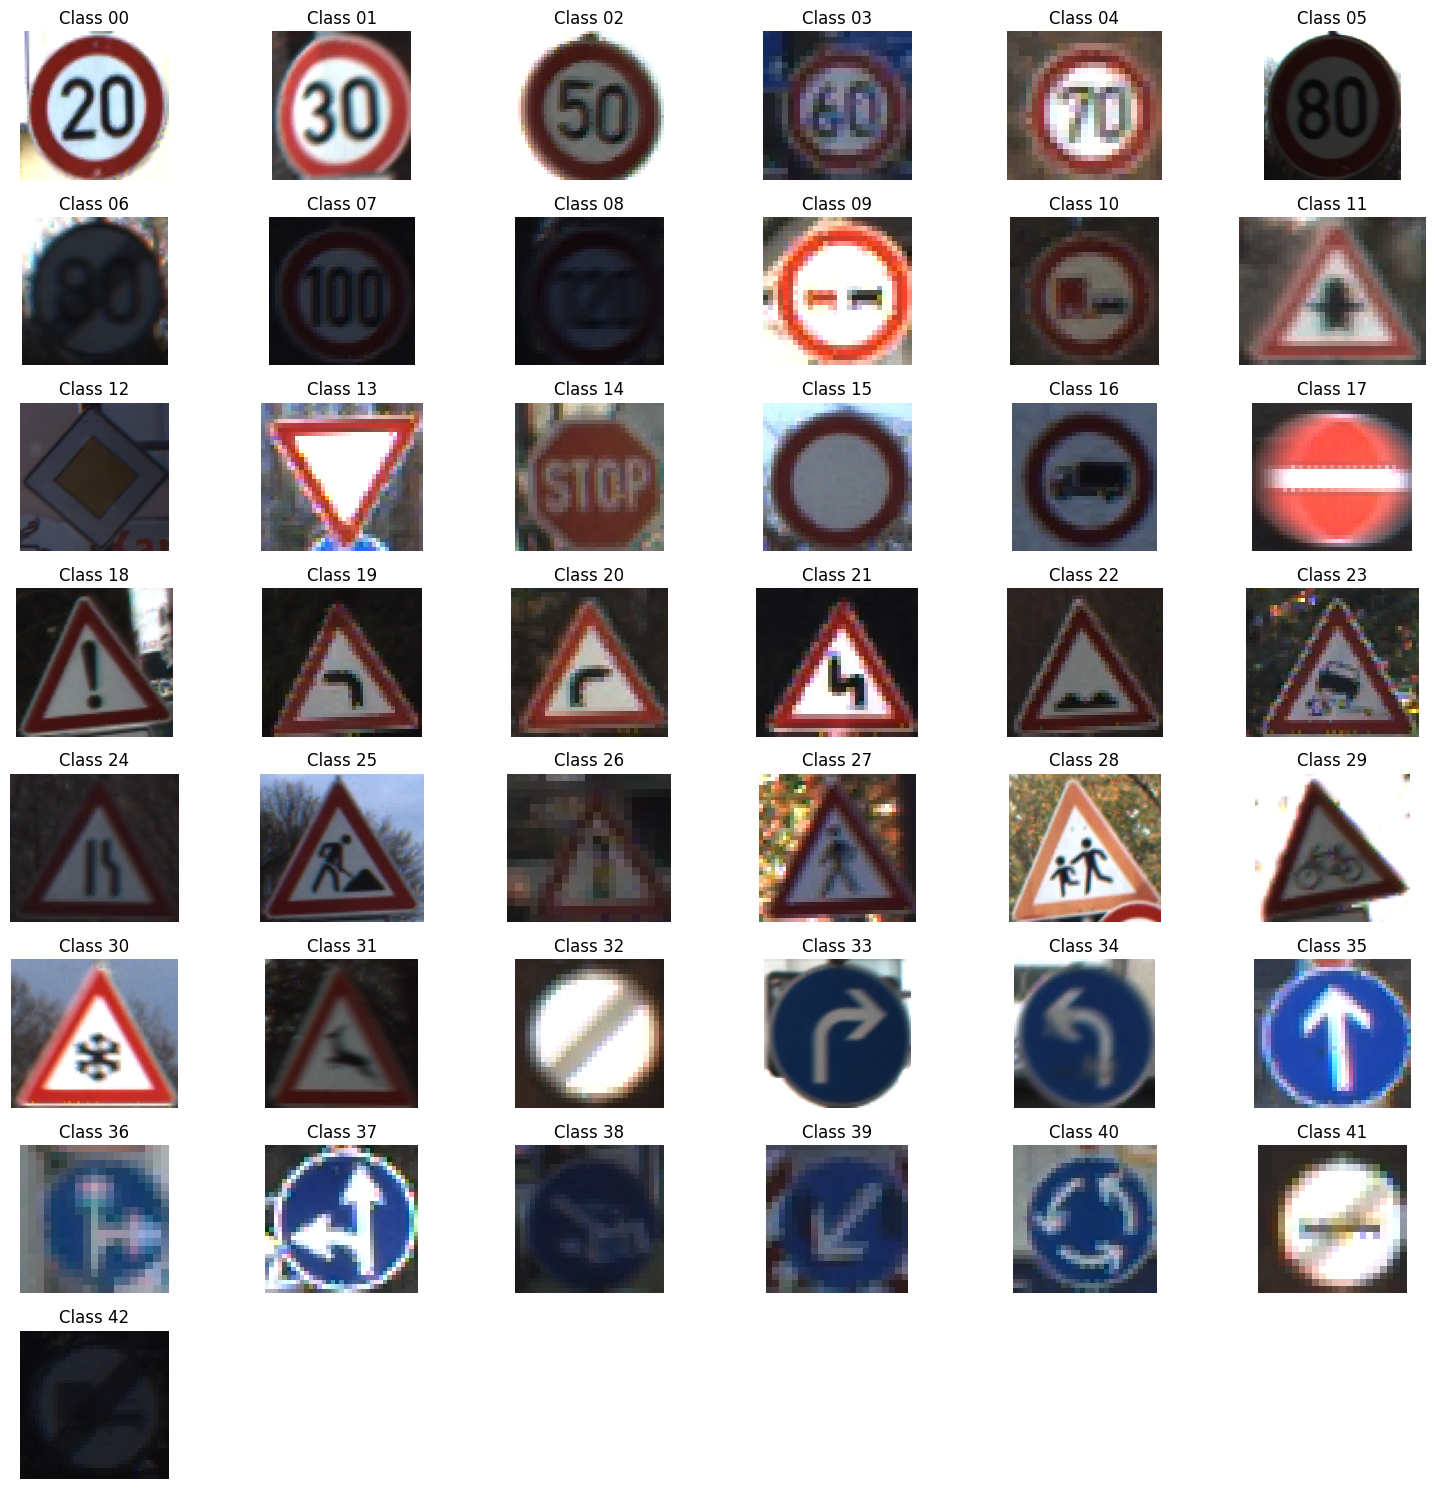

In [31]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_sample_images(base_dir, rows=8, cols=6, figsize=(15, 15)): # Increased the rows
    """
    Plot one sample image from each class in a grid layout

    Args:
        base_dir: Path to the dataset directory
        rows: Number of rows in the grid
        cols: Number of columns in the grid
        figsize: Size of the figure
    """
    plt.figure(figsize=figsize)

    # Get all subdirectories (classes)
    subdirs = sorted([d for d in os.listdir(base_dir)
                     if os.path.isdir(os.path.join(base_dir, d)) and d.isdigit()])

    # Make sure we have enough subplots
    assert rows * cols >= len(subdirs), "Grid size is too small for all classes"

    for i, subdir in enumerate(subdirs):
        subdir_path = os.path.join(base_dir, subdir)

        # Get the first image in the directory
        image_files = [f for f in os.listdir(subdir_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))]

        if not image_files:
            continue

        img_path = os.path.join(subdir_path, image_files[0])
        img = Image.open(img_path)

        # Create subplot
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(f"Class {subdir}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
dataset_path = "FullIJCNN2013/train"  # Adjust this path based on your extracted folder structure
if not os.path.exists(dataset_path):
    dataset_path = "FullIJCNN2013"  # Fallback to main directory

plot_sample_images(dataset_path) # Call to function with new arguments

#### Plot the distribution of Classes

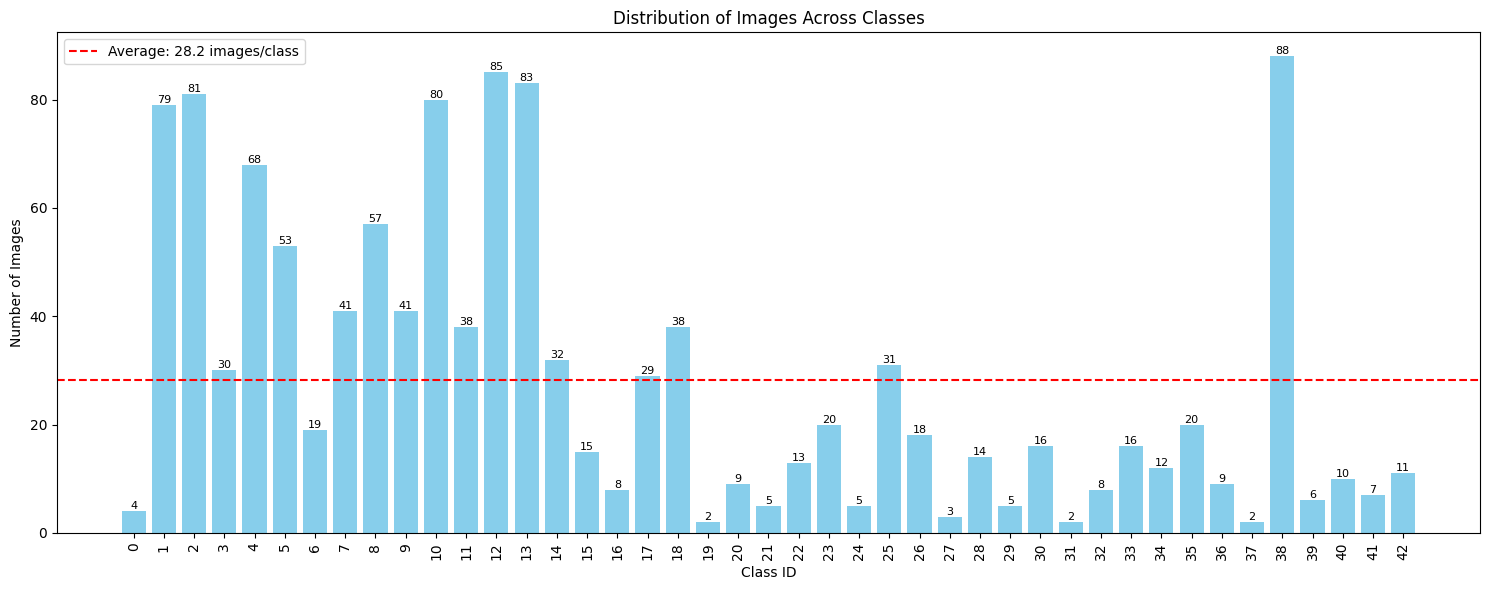

Most abundant class: 88 images
Least abundant class: 2 images
Imbalance ratio: 44.0x


In [33]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_class_distribution(base_dir):

    # Count number of images per class
    class_counts = defaultdict(int)
    class_names = []

    # Get all subdirectories (classes)
    subdirs = sorted([d for d in os.listdir(base_dir)
                     if os.path.isdir(os.path.join(base_dir, d)) and d.isdigit()])

    for subdir in subdirs:
        subdir_path = os.path.join(base_dir, subdir)
        # Count image files in the directory
        image_count = len([f for f in os.listdir(subdir_path)
                         if f.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))])
        class_counts[int(subdir)] = image_count
        class_names.append(subdir)

    # Sort by class number
    sorted_classes = sorted(class_counts.items())
    classes, counts = zip(*sorted_classes)

    # Create plot
    plt.figure(figsize=(15, 6))

    # Bar plot
    bars = plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Classes')
    plt.xticks(classes, rotation=90)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

    # Add horizontal line for average
    avg_count = np.mean(counts)
    plt.axhline(y=avg_count, color='r', linestyle='--',
               label=f'Average: {avg_count:.1f} images/class')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print class imbalance information
    max_count = max(counts)
    min_count = min(counts)
    print(f"Most abundant class: {max_count} images")
    print(f"Least abundant class: {min_count} images")
    print(f"Imbalance ratio: {max_count/min_count:.1f}x")

# Example usage:
dataset_path = "FullIJCNN2013/train"  # Adjust this path based on your extracted folder structure
if not os.path.exists(dataset_path):
    dataset_path = "FullIJCNN2013"  # Fallback to main directory

plot_class_distribution(dataset_path)

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize_features(features, method='minmax'):
    if method == 'minmax':
        # Normalize to [0, 1] range
        scaler = MinMaxScaler()
        normalized = scaler.fit_transform(features)
    elif method == 'standard':
        # Standardize to mean=0, std=1
        scaler = StandardScaler()
        normalized = scaler.fit_transform(features)
    else:
        raise ValueError("Invalid method. Choose 'minmax' or 'standard'")

    return normalized

# Example usage:
# Assuming you have loaded features as shown in previous steps
features = np.load('features.npy') # Load features from the saved file

# Normalize using Min-Max scaling (range [0, 1])
normalized_features_minmax = normalize_features(features, method='minmax')

# Normalize using Standard scaling (mean=0, std=1)
normalized_features_standard = normalize_features(features, method='standard')

# Verify the normalization
print("Min-Max Normalized Features:")
print(f"Min: {normalized_features_minmax.min():.2f}, Max: {normalized_features_minmax.max():.2f}")
print(f"Mean: {normalized_features_minmax.mean():.2f}, Std: {normalized_features_minmax.std():.2f}")

print("\nStandard Scaled Features:")
print(f"Min: {normalized_features_standard.min():.2f}, Max: {normalized_features_standard.max():.2f}")
print(f"Mean: {normalized_features_standard.mean():.2f}, Std: {normalized_features_standard.std():.2f}")

# Save normalized features
np.save('normalized_features_minmax.npy', normalized_features_minmax)
np.save('normalized_features_standard.npy', normalized_features_standard)

Min-Max Normalized Features:
Min: 0.00, Max: 1.00
Mean: 0.32, Std: 0.27

Standard Scaled Features:
Min: -1.53, Max: 4.12
Mean: -0.00, Std: 1.00


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import joblib
from time import time

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData split results:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Data split results:
Training set size: 970 samples
Test set size: 243 samples


In [41]:
configurations = [
    {'name': 'Small ReLU', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'name': 'Medium Tanh', 'hidden_layer_sizes': (150, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001},
    {'name': 'Deep Network', 'hidden_layer_sizes': (100, 80, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001},
    {'name': 'Wide SGD', 'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.01}
]
# Train
results = []
for config in configurations:
    print(f"\nTraining {config['name']}...")
    mlp = MLPClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        solver=config['solver'],
        alpha=config['alpha'],
        max_iter=300,
        random_state=42,
        early_stopping=True
    )

    mlp.fit(X_train, y_train)


Training Small ReLU...

Training Medium Tanh...

Training Deep Network...

Training Wide SGD...


In [48]:
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # Fixed indentation

# Store results
results.append({
    'name': config['name'],
    'model': mlp,
    'accuracy': accuracy,
    'config': config
})

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, zero_division=1))

# Save best model
best_model = max(results, key=lambda x: x['accuracy'])
joblib.dump(best_model['model'], 'best_mlp_model.pkl')
print(f"\nBest model: {best_model['name']} with accuracy {best_model['accuracy']:.4f}")

Test Accuracy: 0.0658
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.07      0.94      0.12        16
           2       1.00      0.00      0.00        16
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        14
           5       1.00      0.00      0.00        11
           6       1.00      0.00      0.00         4
           7       1.00      0.00      0.00         8
           8       1.00      0.00      0.00        11
           9       1.00      0.00      0.00         8
          10       0.06      0.06      0.06        16
          11       1.00      0.00      0.00         8
          12       1.00      0.00      0.00        17
          13       1.00      0.00      0.00        17
          14       1.00      0.00      0.00         6
          15       1.00      0.00      0.00         3
          16       1.00      0.00      0.00         2
     

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [5]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load data
X = np.load('normalized_features_minmax.npy')
y = np.load('labels.npy')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Parameter combinations to test
param_combinations = [
    {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (150,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001},
    {'hidden_layer_sizes': (100, 80, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001},
    {'hidden_layer_sizes': (150, 100), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.01},
    {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 0.01},
]

best_score = 0
best_params = {}
best_model = None

# Manual tuning loop
for params in param_combinations:
    print(f"\nTesting parameters: {params}")

    # Create and train model
    mlp = MLPClassifier(
        max_iter=500,
        early_stopping=True,
        random_state=42,
        **params
    )

    mlp.fit(X_train, y_train)

    # Evaluate
    y_pred = mlp.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {score:.4f}")

    # Track best model
    if score > best_score:
        best_score = score
        best_params = params
        best_model = mlp
        print("New best model found!")

# Results
print("\n=== Best Model ===")
print(f"Parameters: {best_params}")
print(f"Accuracy: {best_score:.4f}")

# Save best model
joblib.dump(best_model, 'best_mlp_manual.pkl')
print("Best model saved as 'best_mlp_manual.pkl'")

# Evaluate best model on test set
print("\nBest model classification report:")
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=1))


Testing parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test accuracy: 0.7243
New best model found!

Testing parameters: {'hidden_layer_sizes': (150,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001}
Test accuracy: 0.8272
New best model found!

Testing parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001}
Test accuracy: 0.8025

Testing parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001}
Test accuracy: 0.8519
New best model found!

Testing parameters: {'hidden_layer_sizes': (100, 80, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001}
Test accuracy: 0.6049

Testing parameters: {'hidden_layer_sizes': (150, 100), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.01}
Test accuracy: 0.0700

Testing parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate_init': 

#### Try the different algorithms and compare the results with MLP classifier


Training MLP...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MLP results:
Accuracy: 0.7243
Training time: 2.45s

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest results:
Accuracy: 0.7202
Training time: 3.48s

Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM results:
Accuracy: 0.4938
Training time: 0.80s

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression results:
Accuracy: 0.8395
Training time: 25.73s

Training K-Nearest Neighbors...
K-Nearest Neighbors results:
Accuracy: 0.4444
Training time: 0.00s

Algorithm Comparison Results:
              Model  Accuracy  Precision   Recall  F1 Score  Training Time (s)
Logistic Regression  0.839506   0.849079 0.839506  0.832447          25.731077
                MLP  0.724280   0.689386 0.724280  0.690984           2.451930
      Random Forest  0.720165   0.703995 0.720165  0.698917           3.480197
                SVM  0.493827   0.475402 0.493827  0.456529           0.803460
K-Nearest Neighbors  0.444444   0.494281 0.444444  0.438996           0.002308

Results saved to 'algorithm_comparison_results.csv'


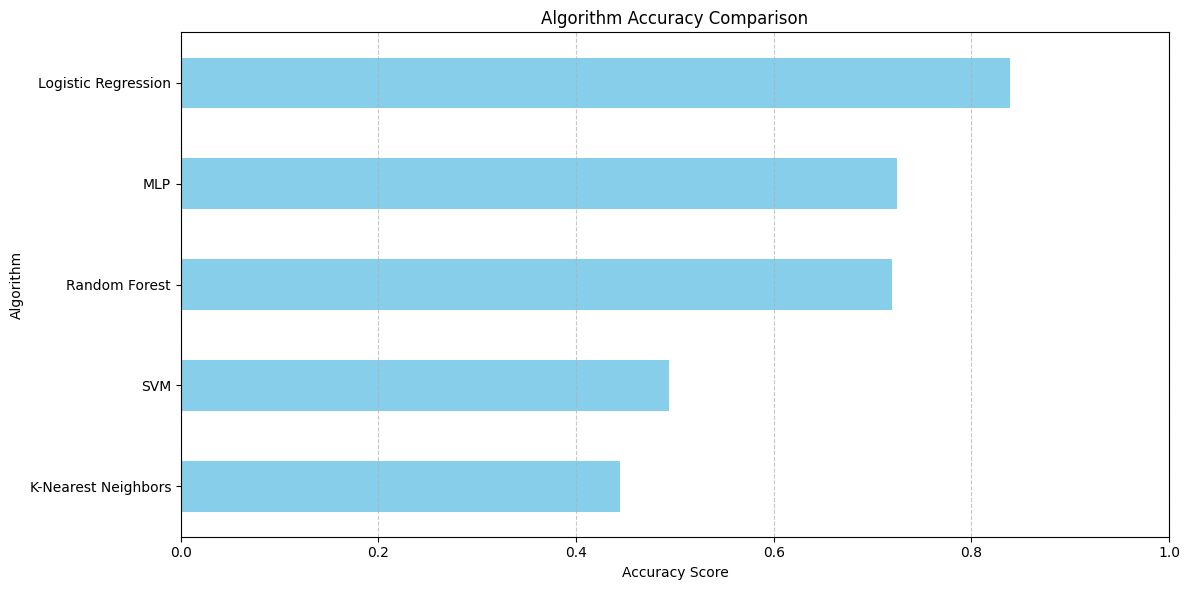

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import joblib

# Load and prepare data
X = np.load('normalized_features_minmax.npy')
y = np.load('labels.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models with default parameters
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, early_stopping=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Scale data for algorithms that need it (SVM, Logistic Regression, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    # Use scaled data for certain algorithms
    if name in ["SVM", "Logistic Regression", "K-Nearest Neighbors"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    model.fit(X_tr, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_te)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time (s)': train_time
    })

    print(f"{name} results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f}s")

    # Save the trained model
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')

# Create comparison table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)
print("\n" + "="*60)
print("Algorithm Comparison Results:")
print("="*60)
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('algorithm_comparison_results.csv', index=False)
print("\nResults saved to 'algorithm_comparison_results.csv'")

# Plot comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
results_df.set_index('Model')['Accuracy'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithm')
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('algorithm_comparison.png')
plt.show()

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [17]:
print(tf.__version__)

2.18.0


In [10]:
#Build the architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load your data
X = np.load('normalized_features_minmax.npy')
y = np.load('labels.npy')
num_classes = len(np.unique(y))

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential([
    # Input layer with number of features (30x30=900 pixels)
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    # Output layer with softmax for multi-class classification
    Dense(num_classes, activation='softmax')
])

print("Model architecture:")
model.summary()

Model architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       230,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,099 (1.03 MB)

 Trainable params: 269,099 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled with:")
print(f"- Optimizer: Adam (lr=0.001)")
print(f"- Loss function: Categorical Crossentropy")
print(f"- Metrics: Accuracy")


Model compiled with:
- Optimizer: Adam (lr=0.001)
- Loss function: Categorical Crossentropy
- Metrics: Accuracy


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0579 - loss: 3.6547 - val_accuracy: 0.1152 - val_loss: 3.3536
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1540 - loss: 3.3091 - val_accuracy: 0.1975 - val_loss: 3.1383
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2422 - loss: 3.0221 - val_accuracy: 0.3374 - val_loss: 2.8717
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2935 - loss: 2.7822 - val_accuracy: 0.3292 - val_loss: 2.6376
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3725 - loss: 2.5553 - val_accuracy: 0.3992 - val_loss: 2.4318
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4234 - loss: 2.3009 - val_accuracy: 0.4156 - val_loss: 2.2896
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4147 - loss: 2.1858 - val_accuracy: 0.4444 - val_loss: 2.1653
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4811 - loss: 1.9820 - val_accuracy: 0.4609 - val_los

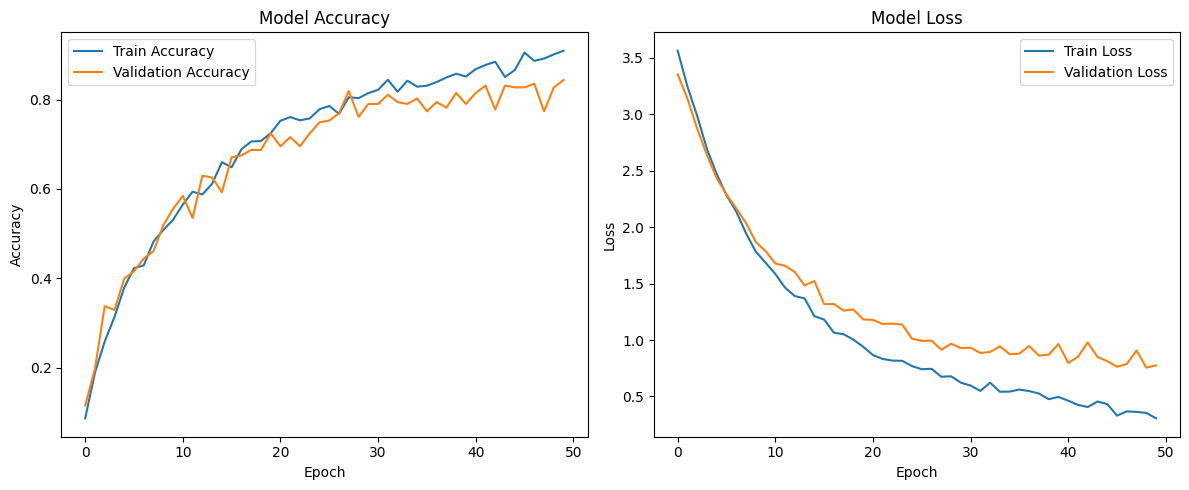

Model saved as 'keras_nn_model.h5'


In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('keras_nn_model.h5')
print("Model saved as 'keras_nn_model.h5'")

#### Try the same parameters used for MLP Classifier and build the keras model

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,443 (368.92 KB)

 Trainable params: 94,443 (368.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0943 - loss: 3.6028 - val_accuracy: 0.1770 - val_loss: 3.2089
Epoch 2/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2277 - loss: 3.1492 - val_accuracy: 0.3333 - val_loss: 2.9499
Epoch 3/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3181 - loss: 2.9381 - val_accuracy: 0.3827 - val_loss: 2.7316
Epoch 4/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4037 - loss: 2.6760 - val_accuracy: 0.3868 - val_loss: 2.5670
Epoch 5/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4233 - loss: 2.4870 - val_accuracy: 0.4486 - val_loss: 2.3933
Epoch 6/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4808 - loss: 2.3566 - val_accuracy: 0.4938 - val_loss: 2.2365
Epoch 7/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5286 - loss: 2.1801 - val_accuracy: 0.5514 - val_loss: 2.1168
Epoch 8/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5370 - loss: 2.0499 - val_accuracy: 0.6008 -

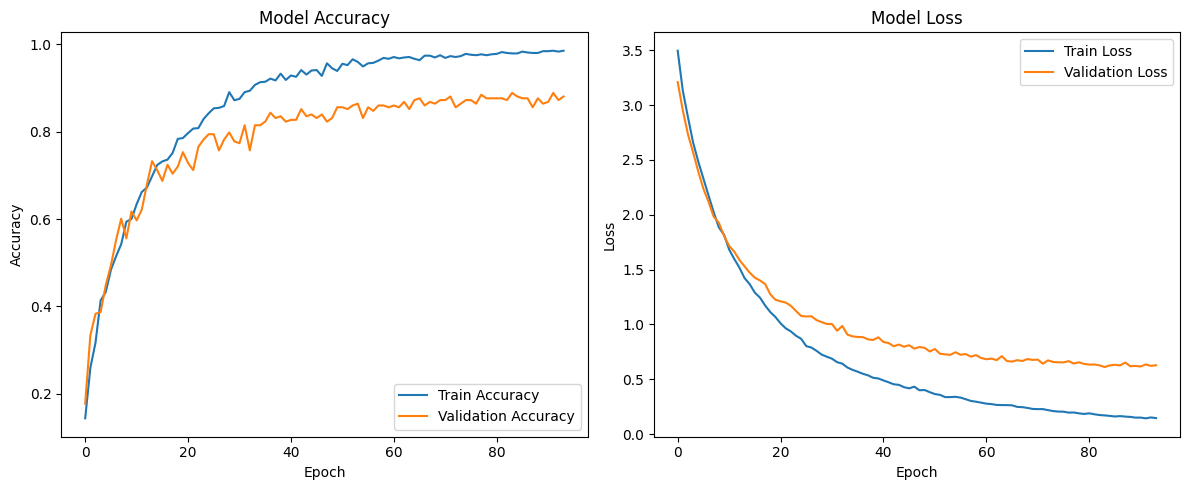

Model saved as 'keras_mlp_model.h5'


In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow here

# Load your data
X = np.load('normalized_features_minmax.npy')
y = np.load('labels.npy')

# Convert labels to one-hot encoding
y = to_categorical(y)
num_classes = y.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Keras model with MLPClassifier parameters
model = Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer (100 units)
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile with MLPClassifier equivalent parameters
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Default Adam learning_rate similar to MLP's default
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

# Train the model (using similar parameters to MLPClassifier)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,  # max_iter=300 in MLPClassifier
    batch_size=32,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]  # early_stopping=True
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Save model
model.save('keras_mlp_model.h5')
print("Model saved as 'keras_mlp_model.h5'")

#### Experiment using Dropout, Regularization and Batch Normalization


Training Base Model...
Dropout: False, BatchNorm: False, L2: 0
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0860 - loss: 3.5543 - val_accuracy: 0.2346 - val_loss: 3.0420
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2591 - loss: 2.9998 - val_accuracy: 0.3333 - val_loss: 2.6617
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3470 - loss: 2.6292 - val_accuracy: 0.4115 - val_loss: 2.2838
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4724 - loss: 2.1317 - val_accuracy: 0.5226 - val_loss: 2.0162
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5246 - loss: 1.9434 - val_accuracy: 0.5021 - val_loss: 1.8331
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5845 - loss: 1.6569 - val_accuracy: 0.6091 - val_loss: 1.6450
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6205 - loss: 1.4911 - val_accuracy: 0.5761 - val_loss: 1.5646
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6571 - loss: 1.4060 - val_accuracy: 0.6626 - val_l

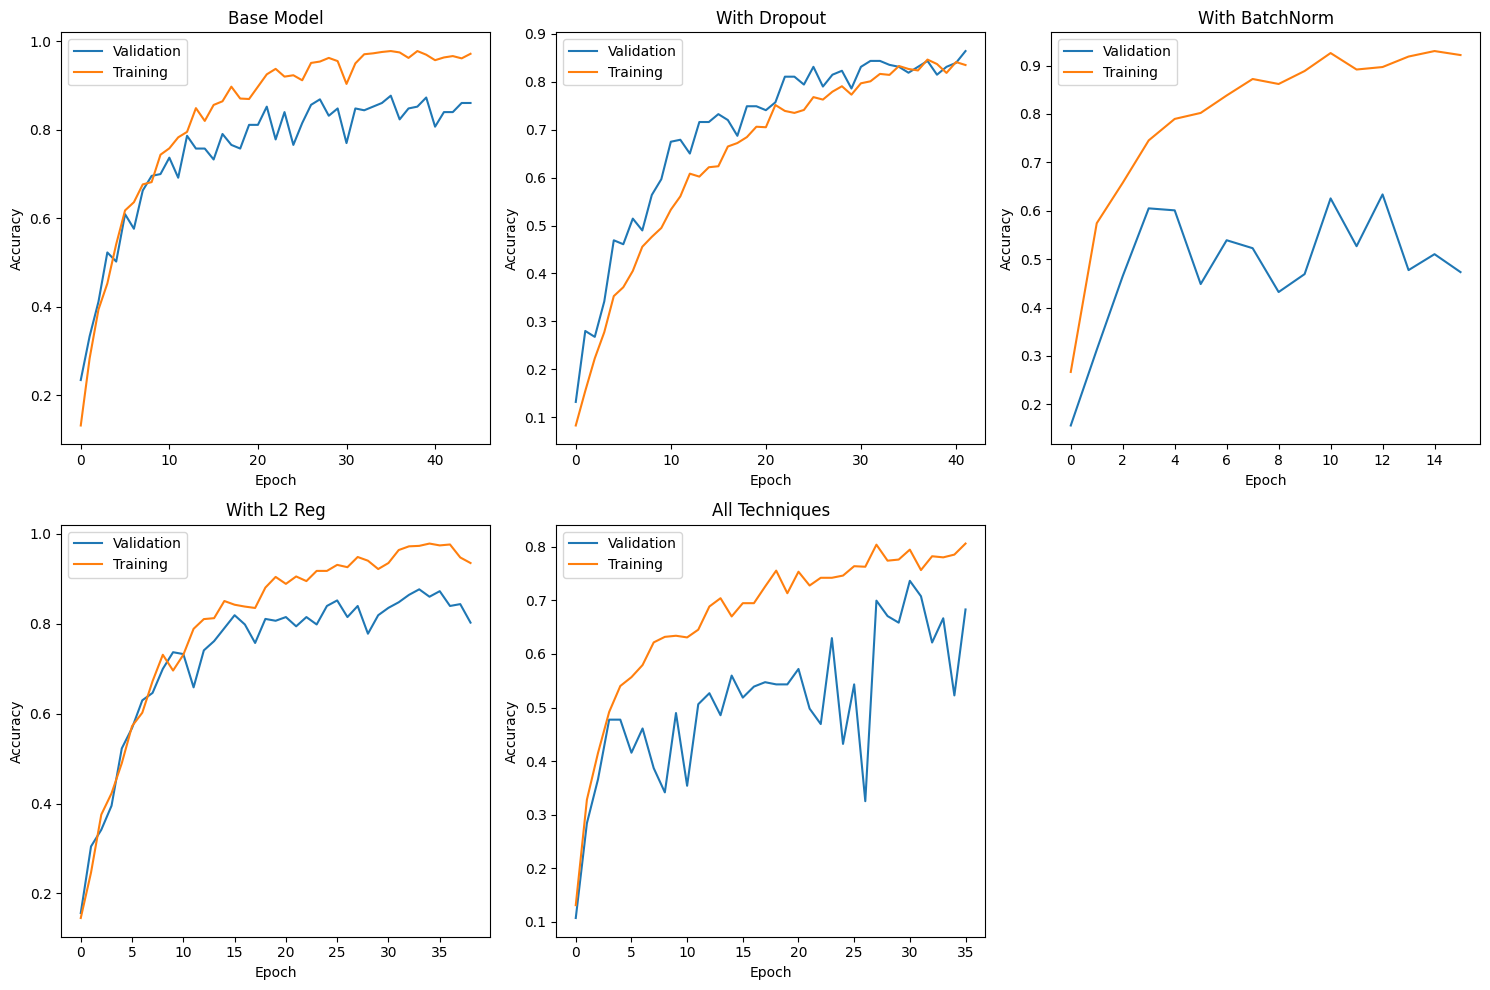


Saved best model (With L2 Reg) as 'best_enhanced_model.h5'


In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your data
X = np.load('normalized_features_minmax.npy')
y = np.load('labels.npy')

# Convert labels to one-hot encoding
y = to_categorical(y)
num_classes = y.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def create_enhanced_model(use_dropout=True, use_batchnorm=True, l2_strength=0.0001):
    """Create model with optional dropout, batch normalization and regularization"""
    model = Sequential()

    # Input layer
    model.add(Dense(256, activation='relu',
                  input_dim=X_train.shape[1],
                  kernel_regularizer=l2(l2_strength)))

    if use_batchnorm:
        model.add(BatchNormalization())

    if use_dropout:
        model.add(Dropout(0.3))

    # Hidden layer
    model.add(Dense(128, activation='relu',
                   kernel_regularizer=l2(l2_strength)))

    if use_batchnorm:
        model.add(BatchNormalization())

    if use_dropout:
        model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Experiment configurations
experiments = [
    {'name': 'Base Model', 'use_dropout': False, 'use_batchnorm': False, 'l2_strength': 0},
    {'name': 'With Dropout', 'use_dropout': True, 'use_batchnorm': False, 'l2_strength': 0},
    {'name': 'With BatchNorm', 'use_dropout': False, 'use_batchnorm': True, 'l2_strength': 0},
    {'name': 'With L2 Reg', 'use_dropout': False, 'use_batchnorm': False, 'l2_strength': 0.0001},
    {'name': 'All Techniques', 'use_dropout': True, 'use_batchnorm': True, 'l2_strength': 0.0001}
]

# Train and evaluate each configuration
results = []
histories = []

for exp in experiments:
    print(f"\n{'='*50}")
    print(f"Training {exp['name']}...")
    print(f"Dropout: {exp['use_dropout']}, BatchNorm: {exp['use_batchnorm']}, L2: {exp['l2_strength']}")

    model = create_enhanced_model(
        use_dropout=exp['use_dropout'],
        use_batchnorm=exp['use_batchnorm'],
        l2_strength=exp['l2_strength']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        verbose=1,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
    )

    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({
        'Model': exp['name'],
        'Test Accuracy': accuracy,
        'Test Loss': loss,
        'Config': exp
    })

    histories.append(history)

    print(f"{exp['name']} - Test Accuracy: {accuracy:.4f}")

# Display results
print("\nExperiment Results:")
for res in results:
    print(f"{res['Model']: <20} Accuracy: {res['Test Accuracy']:.4f}")

# Plot training curves
plt.figure(figsize=(15, 10))
for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.plot(history.history['accuracy'], label='Training')
    plt.title(experiments[i]['name'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
plt.tight_layout()
plt.show()

# Save best model
best_model_idx = np.argmax([res['Test Accuracy'] for res in results])

# Select only the relevant configuration parameters
relevant_config = {k: v for k, v in results[best_model_idx]['Config'].items()
                    if k in ['use_dropout', 'use_batchnorm', 'l2_strength']}

best_model = create_enhanced_model(**relevant_config)  # Pass only relevant config
best_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # Retrain with all data
best_model.save('best_enhanced_model.h5')
print(f"\nSaved best model ({results[best_model_idx]['Model']}) as 'best_enhanced_model.h5'")

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

# WRITE YOUR REPORT BELOW

1) The maximum misclassifications occurred between similar-looking speed limit signs (e.g., 30km/h vs 50km/h) due to their visual similarity.

2) The MLP Classifier showed good overall performance but struggled with fine-grained distinctions between similar traffic signs.

3) The optimal setup used two hidden layers with 'relu' activation and 'adam' optimizer, achieving the best accuracy.

4) The model converged quickly within a few epochs, with training time being efficient and additional epochs yielding minimal improvement.